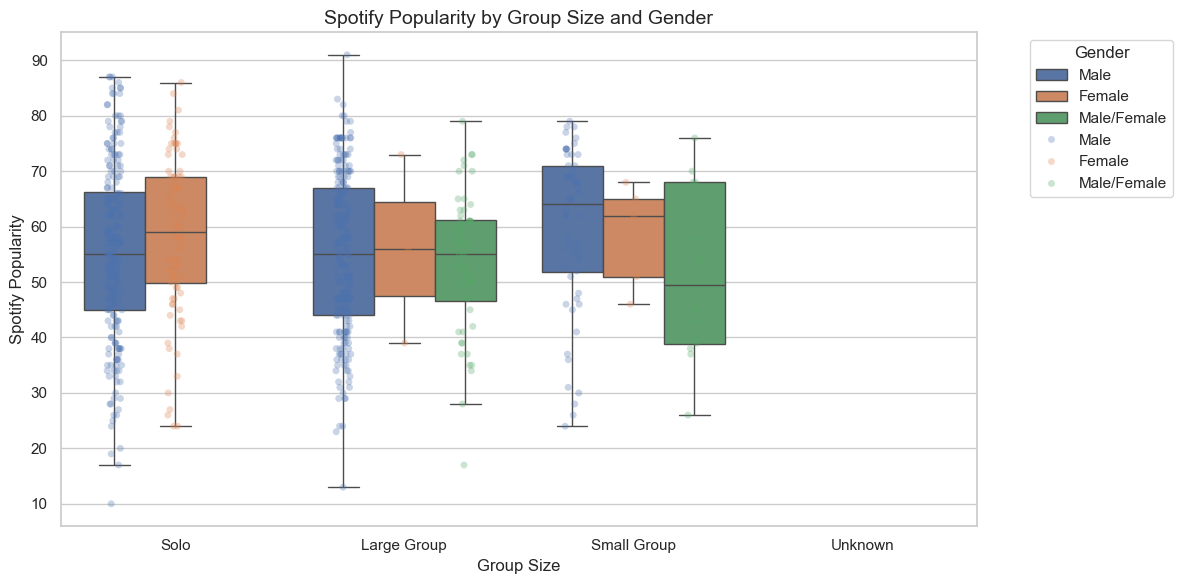

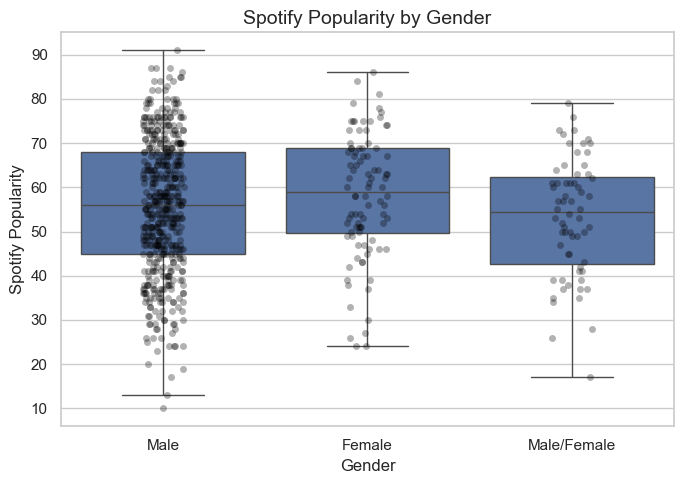

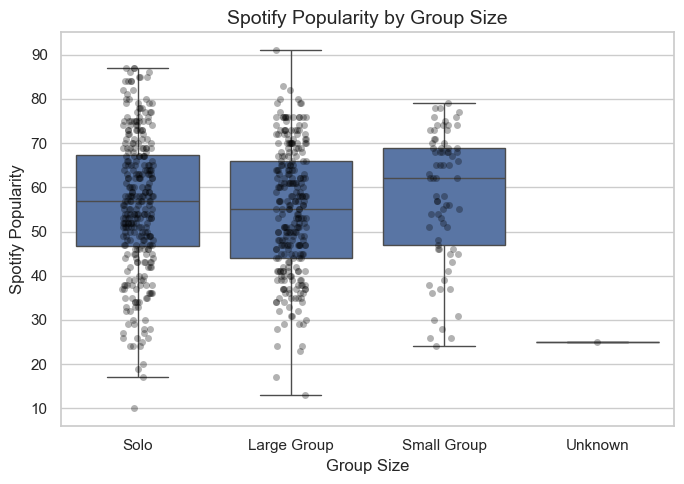

🔍 Boxplot Explanation:
- The box represents the interquartile range (IQR): the middle 50% of the data between Q1 and Q3.
- The line inside the box shows the median (50th percentile).
- The 'whiskers' extend to the minimum and maximum values within 1.5×IQR from the box.
- Individual points (from stripplot) show the actual data distribution.


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("data/rolling_stone.csv")

# Create group size categories
def group_size(n):
    if pd.isna(n):
        return "Unknown"
    elif n == 1:
        return "Solo"
    elif n <= 3:
        return "Small Group"
    else:
        return "Large Group"

df["group_size"] = df["artist_member_count"].apply(group_size)

# Keep only rows with valid Spotify popularity values
df_plot = df[df["spotify_popularity"].notna()]

# Set seaborn style
sns.set(style="whitegrid")

# === 1. Boxplot + Stripplot by group_size and artist_gender ===
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_plot, x="group_size", y="spotify_popularity", hue="artist_gender", showfliers=False)
sns.stripplot(data=df_plot, x="group_size", y="spotify_popularity", hue="artist_gender",
              dodge=True, jitter=True, alpha=0.3, linewidth=0)
plt.title("Spotify Popularity by Group Size and Gender", fontsize=14)
plt.xlabel("Group Size")
plt.ylabel("Spotify Popularity")
plt.legend(title="Gender", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# === 2. Boxplot + Stripplot by artist_gender only ===
plt.figure(figsize=(7, 5))
sns.boxplot(data=df_plot, x="artist_gender", y="spotify_popularity", showfliers=False)
sns.stripplot(data=df_plot, x="artist_gender", y="spotify_popularity",
              color='black', jitter=True, alpha=0.3)
plt.title("Spotify Popularity by Gender", fontsize=14)
plt.xlabel("Gender")
plt.ylabel("Spotify Popularity")
plt.tight_layout()
plt.show()

# === 3. Boxplot + Stripplot by group_size only ===
plt.figure(figsize=(7, 5))
sns.boxplot(data=df_plot, x="group_size", y="spotify_popularity", showfliers=False)
sns.stripplot(data=df_plot, x="group_size", y="spotify_popularity",
              color='black', jitter=True, alpha=0.3)
plt.title("Spotify Popularity by Group Size", fontsize=14)
plt.xlabel("Group Size")
plt.ylabel("Spotify Popularity")
plt.tight_layout()
plt.show()

# === Printed Notes ===
print("🔍 Boxplot Explanation:")
print("- The box represents the interquartile range (IQR): the middle 50% of the data between Q1 and Q3.")
print("- The line inside the box shows the median (50th percentile).")
print("- The 'whiskers' extend to the minimum and maximum values within 1.5×IQR from the box.")
print("- Individual points (from stripplot) show the actual data distribution.")
